# **Desafio IHM Stefanini - 01 - Análise exploratória e preparação dos dados**

## **Carregando as bibliotecas**

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Configurações do notebook**

In [17]:
%matplotlib inline
sns.set(style='white')
pd.set_option('display.max_columns', None) # Apenas se precisar
# pd.set_option('display.max_rows', None) # Apenas se precisar
# pd.options.display.float_format = '{:.2f}'.format # Suprimindo notação científica e exibindo duas casas decimais

## **Carregando os dados**

In [18]:
df = pd.read_csv("dados_ihm_stefanini/MiningProcess_Flotation_Plant_Database.csv", decimal=',')

## **Análise exploratória**

O conjunto de dados é sobre uma planta de flotação de um processo de mineração.<br/>
Assim, algumas informações já são disponibilizadas sobre o conjunto de dados:
- A variável objetivo é a coluna **% Silica Concentrate**;
- O conjunto de dados foi coletado no período de março/2017 até setembro/2017;
- Algumas variáveis são coletadas a cada 20 segundos;
- Algumas variáveis são coletadas a cada hora.

Fonte: [Kaggle - Mining Quality Prediction](https://www.kaggle.com/code/gcdatkin/mining-quality-prediction)

### **Primeiras informações**

**Primeiras entradas do conjunto de dados:**

In [19]:
df.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,250.576,295.096,306.4,250.225,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,250.862,295.096,306.4,250.137,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,250.313,295.096,306.4,251.345,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,250.049,295.096,306.4,250.422,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,249.895,295.096,306.4,249.983,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


Nota-se que algumas colunas variam a cada ponto de coleta e outras não, conforme explicado na descrição do dataset no Kaggle que algumas colunas são coletadas a cada 20 segundos e outras a cada hora.

**Informações do conjunto de dados:**

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   date                          737453 non-null  object 
 1   % Iron Feed                   737453 non-null  float64
 2   % Silica Feed                 737453 non-null  float64
 3   Starch Flow                   737453 non-null  float64
 4   Amina Flow                    737453 non-null  float64
 5   Ore Pulp Flow                 737453 non-null  float64
 6   Ore Pulp pH                   737453 non-null  float64
 7   Ore Pulp Density              737453 non-null  float64
 8   Flotation Column 01 Air Flow  737453 non-null  float64
 9   Flotation Column 02 Air Flow  737453 non-null  float64
 10  Flotation Column 03 Air Flow  737453 non-null  float64
 11  Flotation Column 04 Air Flow  737453 non-null  float64
 12  Flotation Column 05 Air Flow  737453 non-nul

Com exceção da coluna **date** que está no formato incorreto (`object`), todas as outras estão no formato correto (`float`)

**Corrigindo o formato da coluna date**:

In [21]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')

**Dimensões do conjunto de dados:**

In [22]:
print(f"Linhas: {df.shape[0]}")
print(f"Colunas: {df.shape[1]}")

Linhas: 737453
Colunas: 24


**Valores ausentes no conjunto de dados:**

In [23]:
df.isnull().sum()

date                            0
% Iron Feed                     0
% Silica Feed                   0
Starch Flow                     0
Amina Flow                      0
Ore Pulp Flow                   0
Ore Pulp pH                     0
Ore Pulp Density                0
Flotation Column 01 Air Flow    0
Flotation Column 02 Air Flow    0
Flotation Column 03 Air Flow    0
Flotation Column 04 Air Flow    0
Flotation Column 05 Air Flow    0
Flotation Column 06 Air Flow    0
Flotation Column 07 Air Flow    0
Flotation Column 01 Level       0
Flotation Column 02 Level       0
Flotation Column 03 Level       0
Flotation Column 04 Level       0
Flotation Column 05 Level       0
Flotation Column 06 Level       0
Flotation Column 07 Level       0
% Iron Concentrate              0
% Silica Concentrate            0
dtype: int64

Não há valores ausentes no conjunto de dados.

### **Análises estatísticas do conjunto de dados**

**Resumo estatístico:**

In [24]:
df.describe(exclude=('datetime'))

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000
mean,56.294739,14.651716,2869.140569,488.144697,397.578372,9.767639,1.680380,280.151856,277.159965,281.082397,299.447794,299.917814,292.071485,290.754856,520.244823,522.649555,531.352662,420.320973,425.251706,429.941018,421.021231,65.050068,2.326763
std,5.157744,6.807439,1215.203734,91.230534,9.699785,0.387007,0.069249,29.621288,30.149357,28.558268,2.572538,3.636579,30.217804,28.670105,131.014924,128.165050,150.842164,91.794432,84.535822,89.862225,84.891491,1.118645,1.125554
min,42.740000,1.310000,0.002026,241.669000,376.249000,8.753340,1.519820,175.510000,175.156000,176.469000,292.195000,286.295000,189.928000,185.962000,149.218000,210.752000,126.255000,162.201000,166.991000,155.841000,175.349000,62.050000,0.600000
25%,52.670000,8.940000,2076.320000,431.796000,394.264000,9.527360,1.647310,250.281000,250.457000,250.855000,298.262566,298.068000,262.541000,256.302000,416.978000,441.883000,411.325000,356.679000,357.653000,358.497000,356.772000,64.370000,1.440000
50%,56.080000,13.850000,3018.430000,504.393000,399.249000,9.798100,1.697600,299.344000,296.223000,298.696000,299.805000,299.887120,299.477000,299.011000,491.878000,495.956000,494.318000,411.974000,408.773000,424.664575,411.065000,65.210000,2.000000
75%,59.720000,19.600000,3727.730000,553.257000,402.968000,10.038000,1.728330,300.149000,300.690000,300.382000,300.638000,301.791137,303.061000,301.904000,594.114000,595.464000,601.249000,485.549000,484.329000,492.684000,476.465000,65.860000,3.010000
max,65.780000,33.400000,6300.230000,739.538000,418.641000,10.808100,1.853250,373.871000,375.992000,364.346000,305.871000,310.270000,370.910000,371.593000,862.274000,828.919000,886.822000,680.359000,675.644000,698.861000,659.902000,68.010000,5.530000


Pelo resumo estatístico, não percebe-se valores extremos na variável objetivo.

**Correlação entre as variáveis do conjunto de dados:**

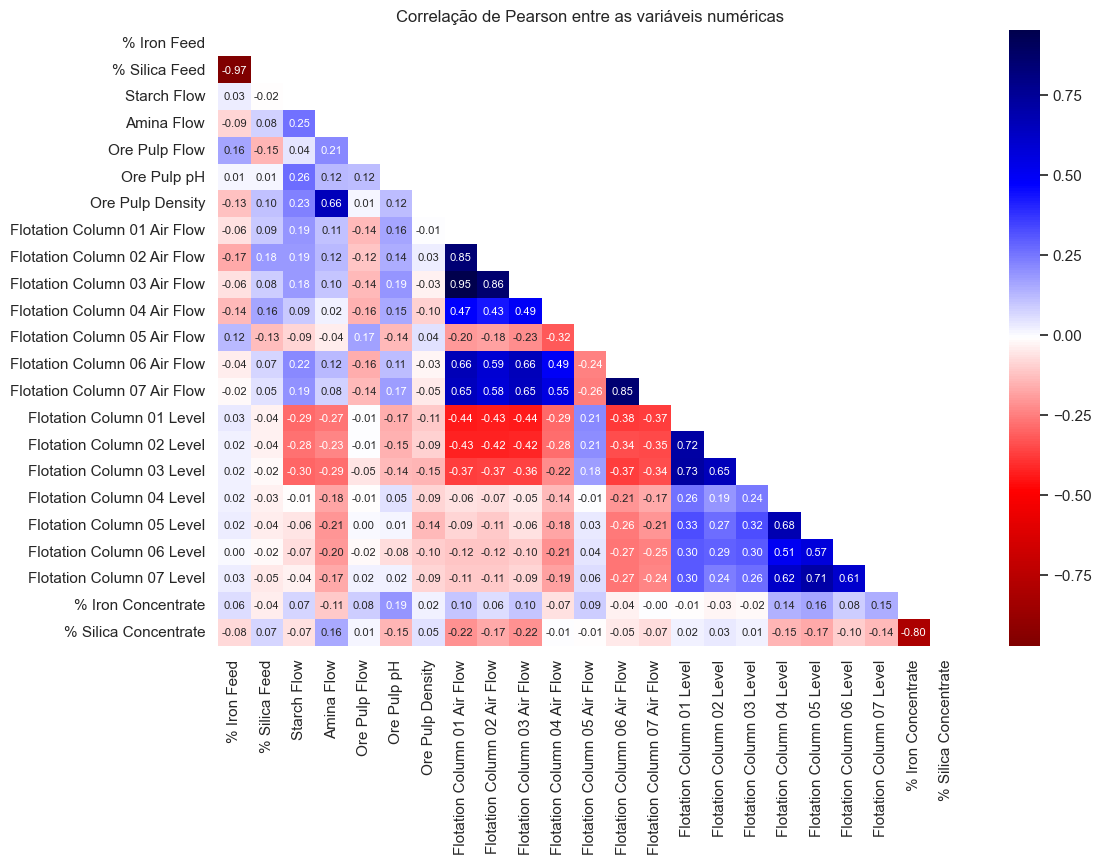

In [37]:
corr_pearson = df.drop(columns=['date']).corr()

# Criando uma máscara para mostrar apenas a parte inferior do triângulo
mask = np.triu(np.ones_like(corr_pearson, dtype=bool))

# Visualização da correlação utilizando Mapa de calor
plt.figure(figsize=(12,8))
plt.title("Correlação de Pearson entre as variáveis numéricas")

sns.heatmap(corr_pearson, cmap="seismic_r", mask=mask, fmt='.2f', annot=True, annot_kws={'size': 8})

#plt.savefig("dados_ihm_stefanini/corr_pearson.png", bbox_inches = 'tight')
plt.show()

Selecionou-se a correlação de Pearson, porque é interessante para quantificar a força e a direção de uma relação linear entre variáveis numéricas.

- Nota-se uma correlação forte entre a variável objetivo concentração de Silica (`% Silica Concentrate`) e a concentração de Ferro (`% Iron Concentrate`) de -0,80.
- Também nota-se correlações modestas (>= 0,1 ou <= -0,1) da variável objetivo com as variáveis:
    - `Amina Flow`
    - `Ore Pulp pH`
    - `Flotation Column 01 Air Flow`
    - `Flotation Column 02 Air Flow`
    - `Flotation Column 03 Air Flow`
    - `Flotation Column 04 Level`
    - `Flotation Column 05 Level`
    - `Flotation Column 06 Level`
    - `Flotation Column 07 Level`

**Presença de outliers:**

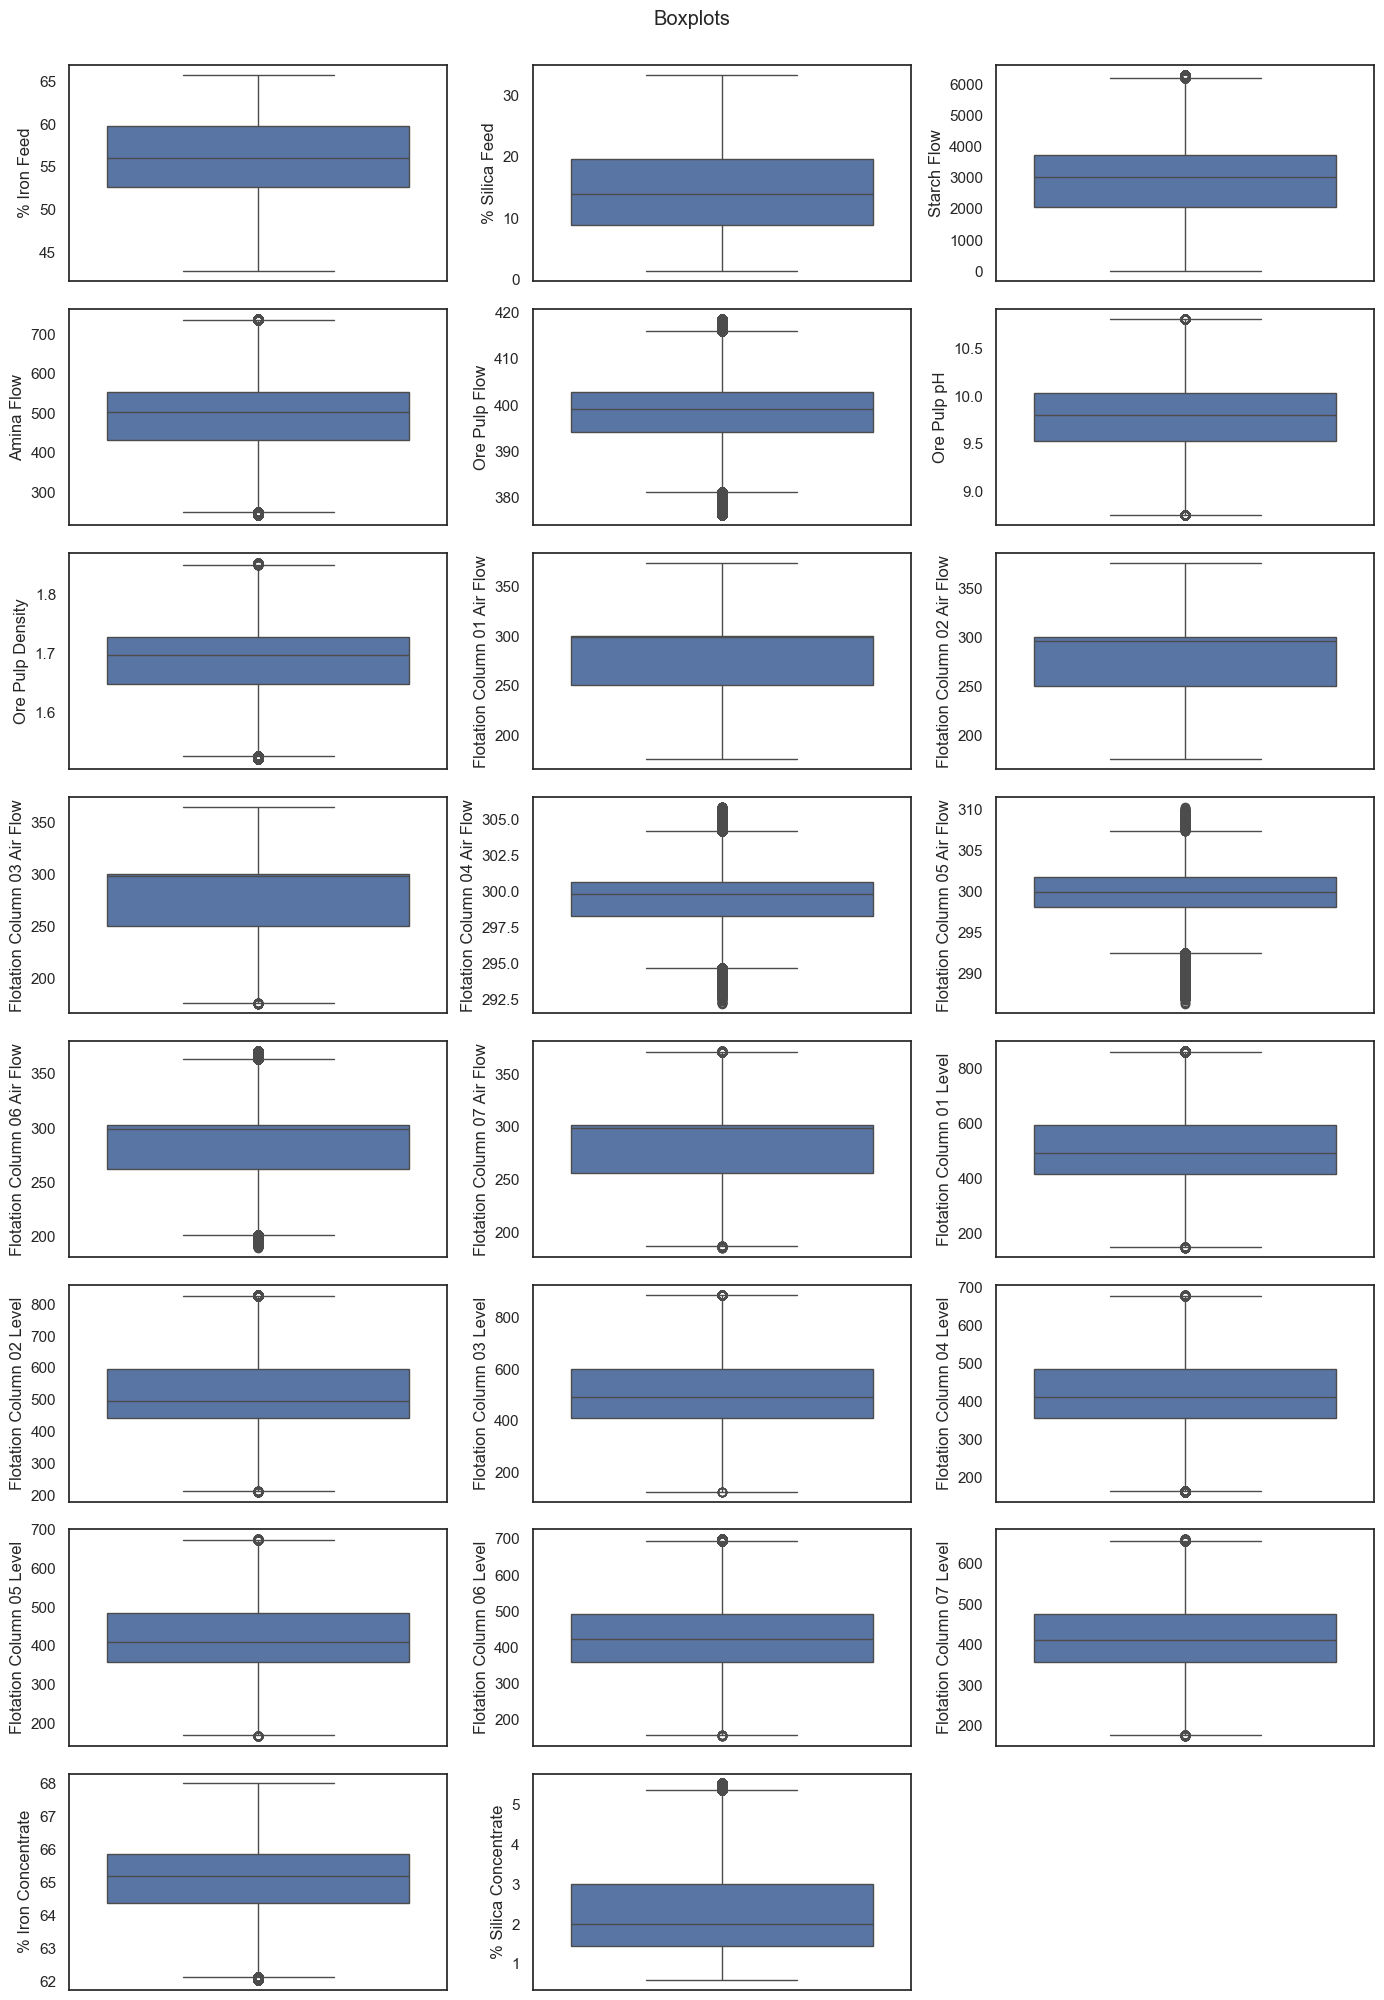

In [26]:
fig, ax = plt.subplots(8, 3, figsize=(14, 20))

fig.delaxes(ax[7,2])
fig.suptitle('Boxplots', y=1)

sns.boxplot(y=df['% Iron Feed'], ax=ax[0,0])
sns.boxplot(y=df['% Silica Feed'], ax=ax[0,1])
sns.boxplot(y=df['Starch Flow'], ax=ax[0,2])
sns.boxplot(y=df['Amina Flow'], ax=ax[1,0])
sns.boxplot(y=df['Ore Pulp Flow'], ax=ax[1,1])
sns.boxplot(y=df['Ore Pulp pH'], ax=ax[1,2])
sns.boxplot(y=df['Ore Pulp Density'], ax=ax[2,0])
sns.boxplot(y=df['Flotation Column 01 Air Flow'], ax=ax[2,1])
sns.boxplot(y=df['Flotation Column 02 Air Flow'], ax=ax[2,2])
sns.boxplot(y=df['Flotation Column 03 Air Flow'], ax=ax[3,0])
sns.boxplot(y=df['Flotation Column 04 Air Flow'], ax=ax[3,1])
sns.boxplot(y=df['Flotation Column 05 Air Flow'], ax=ax[3,2])
sns.boxplot(y=df['Flotation Column 06 Air Flow'], ax=ax[4,0])
sns.boxplot(y=df['Flotation Column 07 Air Flow'], ax=ax[4,1])
sns.boxplot(y=df['Flotation Column 01 Level'], ax=ax[4,2])
sns.boxplot(y=df['Flotation Column 02 Level'], ax=ax[5,0])
sns.boxplot(y=df['Flotation Column 03 Level'], ax=ax[5,1])
sns.boxplot(y=df['Flotation Column 04 Level'], ax=ax[5,2])
sns.boxplot(y=df['Flotation Column 05 Level'], ax=ax[6,0])
sns.boxplot(y=df['Flotation Column 06 Level'], ax=ax[6,1])
sns.boxplot(y=df['Flotation Column 07 Level'], ax=ax[6,2])
sns.boxplot(y=df['% Iron Concentrate'], ax=ax[7,0])
sns.boxplot(y=df['% Silica Concentrate'], ax=ax[7,1])

plt.tight_layout()

Apesar de notarmos *outliers* em algumas variáveis do conjunto de dados, não iremos fazer a remoção dos mesmos, pois serão considerados que podem ocorrem e não como erros de coleta, então podem influenciar no processo.

## **Preparação dos dados**

Além do conjunto de dados originais, será montado outro conjunto de dados de hora em hora.

### **Criando o conjunto de dados com variação de tempo a cada hora**

In [27]:
df_hora = df.groupby('date').mean()

### **Acrescentando períodos ausentes no conjunto de dados por hora**

In [28]:
idx = pd.date_range(start=df_hora.index.min(), end=df_hora.index.max(), freq='1h')
new_df = pd.DataFrame(index=idx)

In [29]:
new_df.head()

""
2017-03-10 01:00:00
2017-03-10 02:00:00
2017-03-10 03:00:00
2017-03-10 04:00:00
2017-03-10 05:00:00


In [30]:
df_hora = pd.merge(new_df, df_hora, left_index=True, right_index=True, how='outer')

### **Preenchendo valores ausentes no conjunto de dados com interpolação linear**

In [31]:
df_hora = df_hora.interpolate(method='linear')

In [32]:
df_hora = df_hora.reset_index()

In [33]:
df_hora.rename(columns={'index': 'date'}, inplace=True)

In [34]:
df_hora = df_hora.sort_values('date').reset_index(drop=True)

### **Exportando o conjunto de dados por hora**

In [35]:
df_hora.to_csv('dados_ihm_stefanini/flotation_hour.csv', index=False)